In [0]:
import torch
import torch.optim as optim
import math
import matplotlib.pyplot as plt

In [0]:
def function(x):
  y = 2.0+ x[0]**2 + x[1]**2 - torch.cos(2.0 * math.pi * x[0]) - torch.cos(2.0 * math.pi * x[1])
  return y
#print(function([0,0]))

Text(0.5, 1.0, 'SGD on 2D-Rastrigin Function')

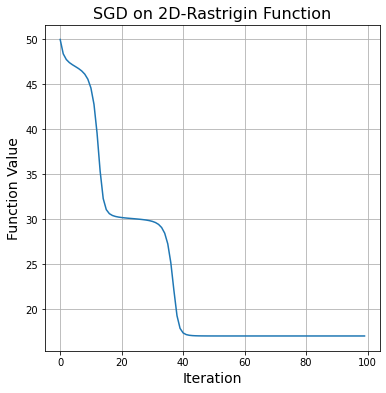

In [43]:
begin_p = torch.tensor([5.0,5.0], requires_grad=True)
epochs = 100
opt = optim.SGD([begin_p], lr=0.01) 
value=[]
for i in range(epochs):
    opt.zero_grad()
    output = function(begin_p)
    value.append(output)
    output.backward()
    opt.step()
fig,ax = plt.subplots(figsize=(6,6))
ax.plot(value)
ax.set_xlabel("Iteration",fontsize=14)
ax.set_ylabel("Function Value",fontsize=14)
ax.grid(True)
ax.set_title("SGD on 2D-Rastrigin Function",fontsize =16)


Text(0.5, 1.0, 'SGD with momentum on 2D-Rastrigin Function')

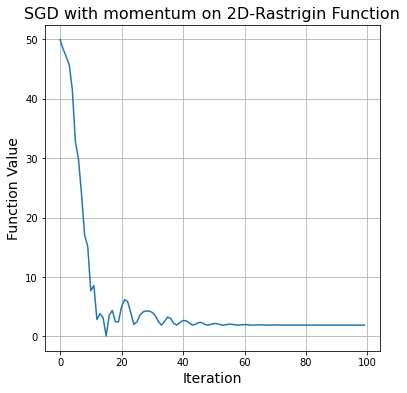

In [44]:
begin_p = torch.tensor([5.0,5.0], requires_grad=True)
epochs = 100
opt = optim.SGD([begin_p], lr=0.01, momentum=0.9) 
value=[]
for i in range(epochs):
    opt.zero_grad()
    output = function(begin_p)
    value.append(output)
    output.backward()
    opt.step()
fig,ax = plt.subplots(figsize=(6,6))
ax.plot(value)
ax.set_xlabel("Iteration",fontsize=14)
ax.set_ylabel("Function Value",fontsize=14)
ax.grid(True)
ax.set_title("SGD with momentum on 2D-Rastrigin Function",fontsize =16)

Text(0.5, 1.0, 'Adagrad on 2D-Rastrigin Function')

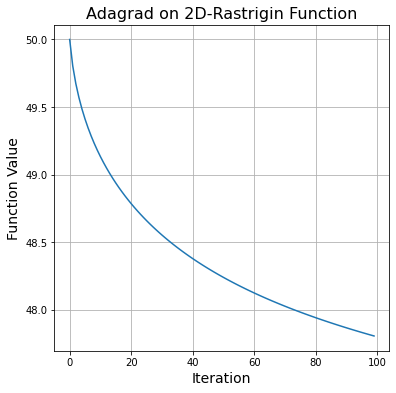

In [45]:
begin_p = torch.tensor([5.0,5.0], requires_grad=True)
epochs = 100
opt = optim.Adagrad([begin_p], lr=0.01) 
value=[]
for i in range(epochs):
    opt.zero_grad()
    output = function(begin_p)
    value.append(output)
    output.backward()
    opt.step()
fig,ax = plt.subplots(figsize=(6,6))
ax.plot(value)
ax.set_xlabel("Iteration",fontsize=14)
ax.set_ylabel("Function Value",fontsize=14)
ax.grid(True)
ax.set_title("Adagrad on 2D-Rastrigin Function",fontsize =16)

Text(0.5, 1.0, 'Adam on 2D-Rastrigin Function')

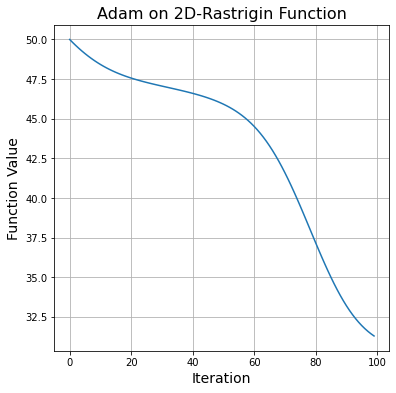

In [46]:
begin_p = torch.tensor([5.0,5.0], requires_grad=True)
epochs = 100
opt = optim.Adam([begin_p], lr=0.01) 
value=[]
for i in range(epochs):
    opt.zero_grad()
    output = function(begin_p)
    value.append(output)
    output.backward()
    opt.step()
fig,ax = plt.subplots(figsize=(6,6))
ax.plot(value)
ax.set_xlabel("Iteration",fontsize=14)
ax.set_ylabel("Function Value",fontsize=14)
ax.grid(True)
ax.set_title("Adam on 2D-Rastrigin Function",fontsize =16)

In [0]:
import torch
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases'+'/iris/iris.data',header=None,encoding='utf-8')
df = df.sample(frac=1,random_state=0) #shuffle
df = df[df[4].isin(['Iris-virginica','Iris-versicolor'])] #filter
#add label indices column

mapping = {k: v for v , k in enumerate(df[4].unique())}
df[5] = (2 * df[4].map(mapping))-1 #labels in{−1,1}
# normalise data
alldata = torch.tensor(df.iloc[:,[0,1,2,3]].values,dtype=torch.float)
alldata = (alldata - alldata.mean(dim=0))/alldata.var(dim=0)
#create datasets
targets_tr = torch.tensor(df.iloc[:75,5].values,dtype=torch.long)
targets_va = torch.tensor(df.iloc[75:,5].values,dtype=torch.long)
data_tr=alldata[:75]
data_va=alldata[75:]


In [0]:
def hinge_loss(y_pred, y_true):
  loss = torch.zeros(1, requires_grad=True)
  for i in range(0,len(y_pred)):
    temp_loss=max(0,1-y_pred[i]*y_true[i])
    loss=loss+temp_loss
  loss=loss/len(y_pred)
  #print(len(y_pred))
  #print(y_true)
  return loss

def svm(x, w, b):
    h = (w*x).sum(1) + b
    return h

def val_label(valoutput,groundlabel):
  truel=0
  for i in range(0,len(valoutput)):
    if valoutput[i] * groundlabel[i]>0:
      truel+=1
  return truel

In [0]:
from torch.utils import data

trainset = data.TensorDataset(data_tr,targets_tr)
trainloader = data.DataLoader(trainset, batch_size=25, shuffle=True) # create your dataloader
validset = data.TensorDataset(data_va,targets_va)
validloader = data.DataLoader(validset, batch_size=25, shuffle=True) # create your dataloader

In [61]:
w = torch.randn(1, 4, requires_grad=True)
b = torch.randn(1, requires_grad=True)

opt = optim.SGD([w,b], lr=0.01, weight_decay=0.0001)
true_label=0
total=0
for epoch in range(100):
    for batch in trainloader:
        opt.zero_grad()
        output=svm(batch[0],w,b)
        # YOUR CODE HERE
        loss=hinge_loss(output,batch[1])
        loss.backward()
        opt.step()
for data in validloader:
  valoutput=svm(data[0],w,b)
  total += len(valoutput)
  true_label +=val_label(valoutput,data[1])
  print(true_label/total)

0.88


In [63]:
w1 = torch.randn(1, 4, requires_grad=True)
b1 = torch.randn(1, requires_grad=True)

opt1 = optim.Adam([w1,b1], lr=0.01, weight_decay=0.0001)
true_label1=0
total1=0
for epoch in range(100):
    for batch in trainloader:
        opt1.zero_grad()
        output=svm(batch[0],w1,b1)
        # YOUR CODE HERE
        loss=hinge_loss(output,batch[1])
        loss.backward()
        opt1.step()
for data in validloader:
  valoutput=svm(data[0],w1,b1)
  total1 += len(valoutput)
  true_label1 +=val_label(valoutput,data[1])
  print(true_label1/total1)

0.88
